In [28]:
from utils import get_prepared_data, get_layers_info, set_plt
from tensorflow import keras
from tensorflow.python.keras import layers
from constants import *
import matplotlib.pyplot as plt
from tqdm import tqdm
from pathlib import Path
import datetime;

In [29]:
(x_train, y_train), (x_test, y_test) = get_prepared_data()
input_picture_shape = x_train.shape[1:]
num_classes = y_train.shape[1]
input_picture_shape

(28, 28, 1)

In [30]:
all_models = []
all_descriptions = []
all_titles = []

changed_param = "comparing convnet and MLP"
for model_layers in [
    [
        keras.Input(shape=input_picture_shape),
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation=ACT_RELU),
        layers.MaxPooling2D(pool_size=(2, 2), strides=1),
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation=ACT_RELU),
        layers.MaxPooling2D(pool_size=(2, 2), strides=1),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ],
    [
        keras.Input(shape=input_picture_shape),
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation=ACT_RELU),
        layers.MaxPooling2D(pool_size=(2, 2), strides=1),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ],
    [
        keras.Input(shape=input_picture_shape),
        layers.Conv2D(filters=8, kernel_size=(3, 3), activation=ACT_RELU),
        layers.MaxPooling2D(pool_size=(2, 2), strides=1),
        layers.Conv2D(filters=16, kernel_size=(3, 3), activation=ACT_RELU),
        layers.MaxPooling2D(pool_size=(2, 2), strides=1),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ],
    [
        keras.Input(shape=input_picture_shape),
        layers.Conv2D(filters=8, kernel_size=(3, 3), activation=ACT_RELU),
        layers.MaxPooling2D(pool_size=(2, 2), strides=1),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ],
]:
    model = keras.Sequential(model_layers)
    all_models.append(model)
    all_descriptions.append(get_layers_info(model_layers))
    conv_filters = ", ".join([str(x.filters) for x in model_layers if type(x) == layers.Conv2D])
    all_titles.append(f"convnet (Conv [{conv_filters}])")

for model_layers in [
    [
        layers.Flatten(input_shape=input_picture_shape),
        layers.Dense(units=150, activation=ACT_RELU),
        layers.Dense(units=100, activation=ACT_RELU),
        layers.Dense(units=50, activation=ACT_RELU),
        layers.Dense(num_classes, activation='softmax'),
    ],
    [
        layers.Flatten(input_shape=input_picture_shape),
        layers.Dense(units=100, activation=ACT_RELU),
        layers.Dense(units=50, activation=ACT_RELU),
        layers.Dense(num_classes, activation='softmax'),
    ],
    [
        layers.Flatten(input_shape=input_picture_shape),
        layers.Dense(units=50, activation=ACT_RELU),
        layers.Dense(num_classes, activation='softmax'),
    ]
]:
    model = keras.Sequential(model_layers)
    all_models.append(model)
    all_descriptions.append(get_layers_info(model_layers))
    dense_neurons = ", ".join([str(x.units) for x in model_layers if type(x) == layers.Dense])
    all_titles.append(f"MLP (Dense [{dense_neurons}])")
all_descriptions

[0  n          type filters kernel_size activation pool_size strides units
 1  0   KerasTensor                                                       
 2  1        Conv2D      32      (3, 3)       relu                        
 3  2  MaxPooling2D                                   (2, 2)  (1, 1)      
 4  3        Conv2D      64      (3, 3)       relu                        
 5  4  MaxPooling2D                                   (2, 2)  (1, 1)      
 6  5       Flatten                                                       
 7  6         Dense                                                     10,
 0  n          type filters kernel_size activation pool_size strides units
 1  0   KerasTensor                                                       
 2  1        Conv2D      32      (3, 3)       relu                        
 3  2  MaxPooling2D                                   (2, 2)  (1, 1)      
 4  3       Flatten                                                       
 5  4         Dense     

In [31]:
for model in all_models:
    model.compile(loss="categorical_crossentropy", optimizer=OPT_RMS_PROP, metrics=["accuracy"])

In [32]:
batch_size = 128
epochs = 5
all_history = []
for model in tqdm(all_models, colour="RED"):
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))
    all_history.append(history)

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/5
469/469 [==============================] - 90s 190ms/step - loss: 0.1358 - accuracy: 0.9593 - val_loss: 0.0399 - val_accuracy: 0.9856
Epoch 2/5
469/469 [==============================] - 102s 217ms/step - loss: 0.0434 - accuracy: 0.9870 - val_loss: 0.0384 - val_accuracy: 0.9862
Epoch 3/5
469/469 [==============================] - 94s 200ms/step - loss: 0.0314 - accuracy: 0.9904 - val_loss: 0.0282 - val_accuracy: 0.9908
Epoch 4/5
469/469 [==============================] - 82s 174ms/step - loss: 0.0248 - accuracy: 0.9927 - val_loss: 0.0298 - val_accuracy: 0.9904
Epoch 5/5
469/469 [==============================] - 71s 151ms/step - loss: 0.0201 - accuracy: 0.9938 - val_loss: 0.0272 - val_accuracy: 0.9912


 12%|█▎        | 1/8 [07:18<51:10, 438.69s/it]

Epoch 1/5
469/469 [==============================] - 23s 48ms/step - loss: 0.2252 - accuracy: 0.9344 - val_loss: 0.0809 - val_accuracy: 0.9763
Epoch 2/5
469/469 [==============================] - 22s 47ms/step - loss: 0.0746 - accuracy: 0.9784 - val_loss: 0.0600 - val_accuracy: 0.9800
Epoch 3/5
469/469 [==============================] - 22s 48ms/step - loss: 0.0554 - accuracy: 0.9840 - val_loss: 0.0497 - val_accuracy: 0.9838
Epoch 4/5
469/469 [==============================] - 14s 30ms/step - loss: 0.0460 - accuracy: 0.9866 - val_loss: 0.0510 - val_accuracy: 0.9838
Epoch 5/5
469/469 [==============================] - 14s 30ms/step - loss: 0.0394 - accuracy: 0.9887 - val_loss: 0.0577 - val_accuracy: 0.9825


 25%|██▌       | 2/8 [08:54<23:42, 237.11s/it]

Epoch 1/5
469/469 [==============================] - 17s 34ms/step - loss: 0.2253 - accuracy: 0.9334 - val_loss: 0.0771 - val_accuracy: 0.9758
Epoch 2/5
469/469 [==============================] - 15s 32ms/step - loss: 0.0708 - accuracy: 0.9785 - val_loss: 0.0518 - val_accuracy: 0.9831
Epoch 3/5
469/469 [==============================] - 11s 24ms/step - loss: 0.0509 - accuracy: 0.9847 - val_loss: 0.0400 - val_accuracy: 0.9868
Epoch 4/5
469/469 [==============================] - 10s 22ms/step - loss: 0.0415 - accuracy: 0.9879 - val_loss: 0.0428 - val_accuracy: 0.9852
Epoch 5/5
469/469 [==============================] - 10s 22ms/step - loss: 0.0358 - accuracy: 0.9893 - val_loss: 0.0416 - val_accuracy: 0.9867


 38%|███▊      | 3/8 [09:59<13:11, 158.33s/it]

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.3130 - accuracy: 0.9149 - val_loss: 0.1559 - val_accuracy: 0.9565
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1370 - accuracy: 0.9603 - val_loss: 0.1028 - val_accuracy: 0.9703
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0909 - accuracy: 0.9740 - val_loss: 0.0786 - val_accuracy: 0.9763
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0699 - accuracy: 0.9796 - val_loss: 0.0638 - val_accuracy: 0.9797
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0589 - accuracy: 0.9826 - val_loss: 0.0582 - val_accuracy: 0.9820


 50%|█████     | 4/8 [10:20<06:57, 104.28s/it]

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.3030 - accuracy: 0.9111 - val_loss: 0.1759 - val_accuracy: 0.9465
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1200 - accuracy: 0.9632 - val_loss: 0.0930 - val_accuracy: 0.9708
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0830 - accuracy: 0.9746 - val_loss: 0.0785 - val_accuracy: 0.9755
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0625 - accuracy: 0.9800 - val_loss: 0.0980 - val_accuracy: 0.9700
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0499 - accuracy: 0.9846 - val_loss: 0.0773 - val_accuracy: 0.9771


 62%|██████▎   | 5/8 [10:34<03:35, 71.74s/it] 

Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 0.3436 - accuracy: 0.9042 - val_loss: 0.1910 - val_accuracy: 0.9424
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1488 - accuracy: 0.9554 - val_loss: 0.1172 - val_accuracy: 0.9635
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1077 - accuracy: 0.9682 - val_loss: 0.1003 - val_accuracy: 0.9700
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0848 - accuracy: 0.9745 - val_loss: 0.0984 - val_accuracy: 0.9710
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0701 - accuracy: 0.9786 - val_loss: 0.0989 - val_accuracy: 0.9716


 75%|███████▌  | 6/8 [10:45<01:42, 51.05s/it]

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.4161 - accuracy: 0.8881 - val_loss: 0.2457 - val_accuracy: 0.9307
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2188 - accuracy: 0.9381 - val_loss: 0.1866 - val_accuracy: 0.9447
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.1694 - accuracy: 0.9509 - val_loss: 0.1528 - val_accuracy: 0.9559
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1389 - accuracy: 0.9600 - val_loss: 0.1450 - val_accuracy: 0.9594
Epoch 5/5
469/469 [==============================] - 2s 3ms/step - loss: 0.1188 - accuracy: 0.9655 - val_loss: 0.1187 - val_accuracy: 0.9656


 88%|████████▊ | 7/8 [10:54<00:37, 37.18s/it]

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.6143 - accuracy: 0.8440 - val_loss: 0.3433 - val_accuracy: 0.9075
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.3308 - accuracy: 0.9083 - val_loss: 0.3021 - val_accuracy: 0.9156
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.3016 - accuracy: 0.9160 - val_loss: 0.2842 - val_accuracy: 0.9207
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2884 - accuracy: 0.9194 - val_loss: 0.2813 - val_accuracy: 0.9215
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2803 - accuracy: 0.9216 - val_loss: 0.2743 - val_accuracy: 0.9244


100%|██████████| 8/8 [11:01<00:00, 82.68s/it]


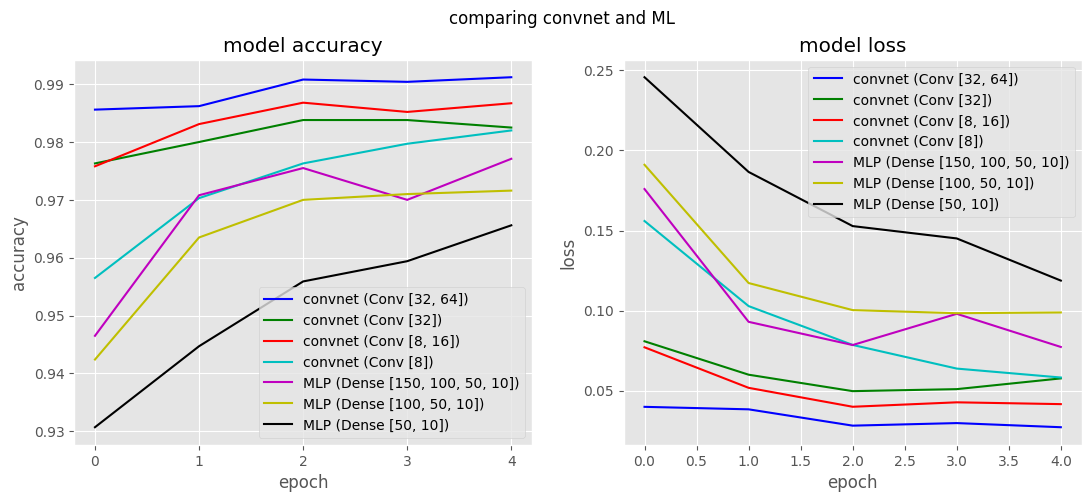

In [37]:
all_title =  f"{changed_param}"
set_plt(all_history, all_titles, all_title)
all_title += f"_{datetime.datetime.now()}"
plt.savefig(f'plots/{all_title}.png')
plt.show()
for i, df in enumerate(all_descriptions):
    df.to_csv(Path(f"csvs/{all_title}_{i}.csv"), index=False)